# Julia for Machine Learning

### Dennis G Wilson

https://github.com/d9w/julia_presentation

# About me

+ Associate Professor in Artificial Intelligence and Big Data at [ISAE-Supaero](https://personnel.isae-supaero.fr/dennis-wilson)
+ Researcher in bio-inspired AI: evolutionary computation and artificial neural networks
+ Co-founder of [Nautilia Computing](https://nautilia.co/), startup in ocean observation
+ Julia package developer since 2013

## Outline

+ What is Julia
+ Data representation
+ Statistics
+ Machine Learning

# What is Julia?

## Julia is interactive

Julia can be run in the REPL in a terminal, in [Jupyter](https://jupyter.org/) (**ju**lia, **pyt**hon, e**R**), or in a script (`script.jl`)

In [1]:
println("Hello World")

Hello World


## Julia is fast



## Julia is compiled

Julia uses Just-in-time (JIT) compilaton, implemented using LLVM. This means that code is compiled the first time that it is called. Here we define a Fibonacci function, but it is not yet compiled

In [2]:
fib(n) = n < 2 ? n : fib(n-1) + fib(n-2)

fib (generic function with 1 method)

The first time that we run the function, it will take longer to compile. However, after compilation, the function will be much faster

In [3]:
@timev fib(10)

  0.011438 seconds (2.01 k allocations: 104.129 KiB)
elapsed time (ns): 11437568
bytes allocated:   106628
pool allocs:       2011


55

In [4]:
@timev fib(10)

  0.000003 seconds (4 allocations: 160 bytes)
elapsed time (ns): 2789
bytes allocated:   160
pool allocs:       4


55

We can also evaluate the machine code which the function compiles to

In [5]:
@code_lowered fib(10)

CodeInfo(
1 ─ %1 = n < 2
└──      goto #3 if not %1
2 ─      return n
3 ─ %4 = n - 1
│   %5 = Main.fib(%4)
│   %6 = n - 2
│   %7 = Main.fib(%6)
│   %8 = %5 + %7
└──      return %8
)

## Julia is typed

Julia's type system is
  + dynamic (types are checked at runtime)
  + nominative (variables rely on explicity type declaration for compatibility)
  + parametric (generic types can be parameterized)
  
Abstract types can be defined and subclassing, allowing for flexibility of not declaring a type. Every type in Julia is a subclass of the `Any` type.

Below is the type heirarchy of the Base Types (from Julia 0.5, may not be current):
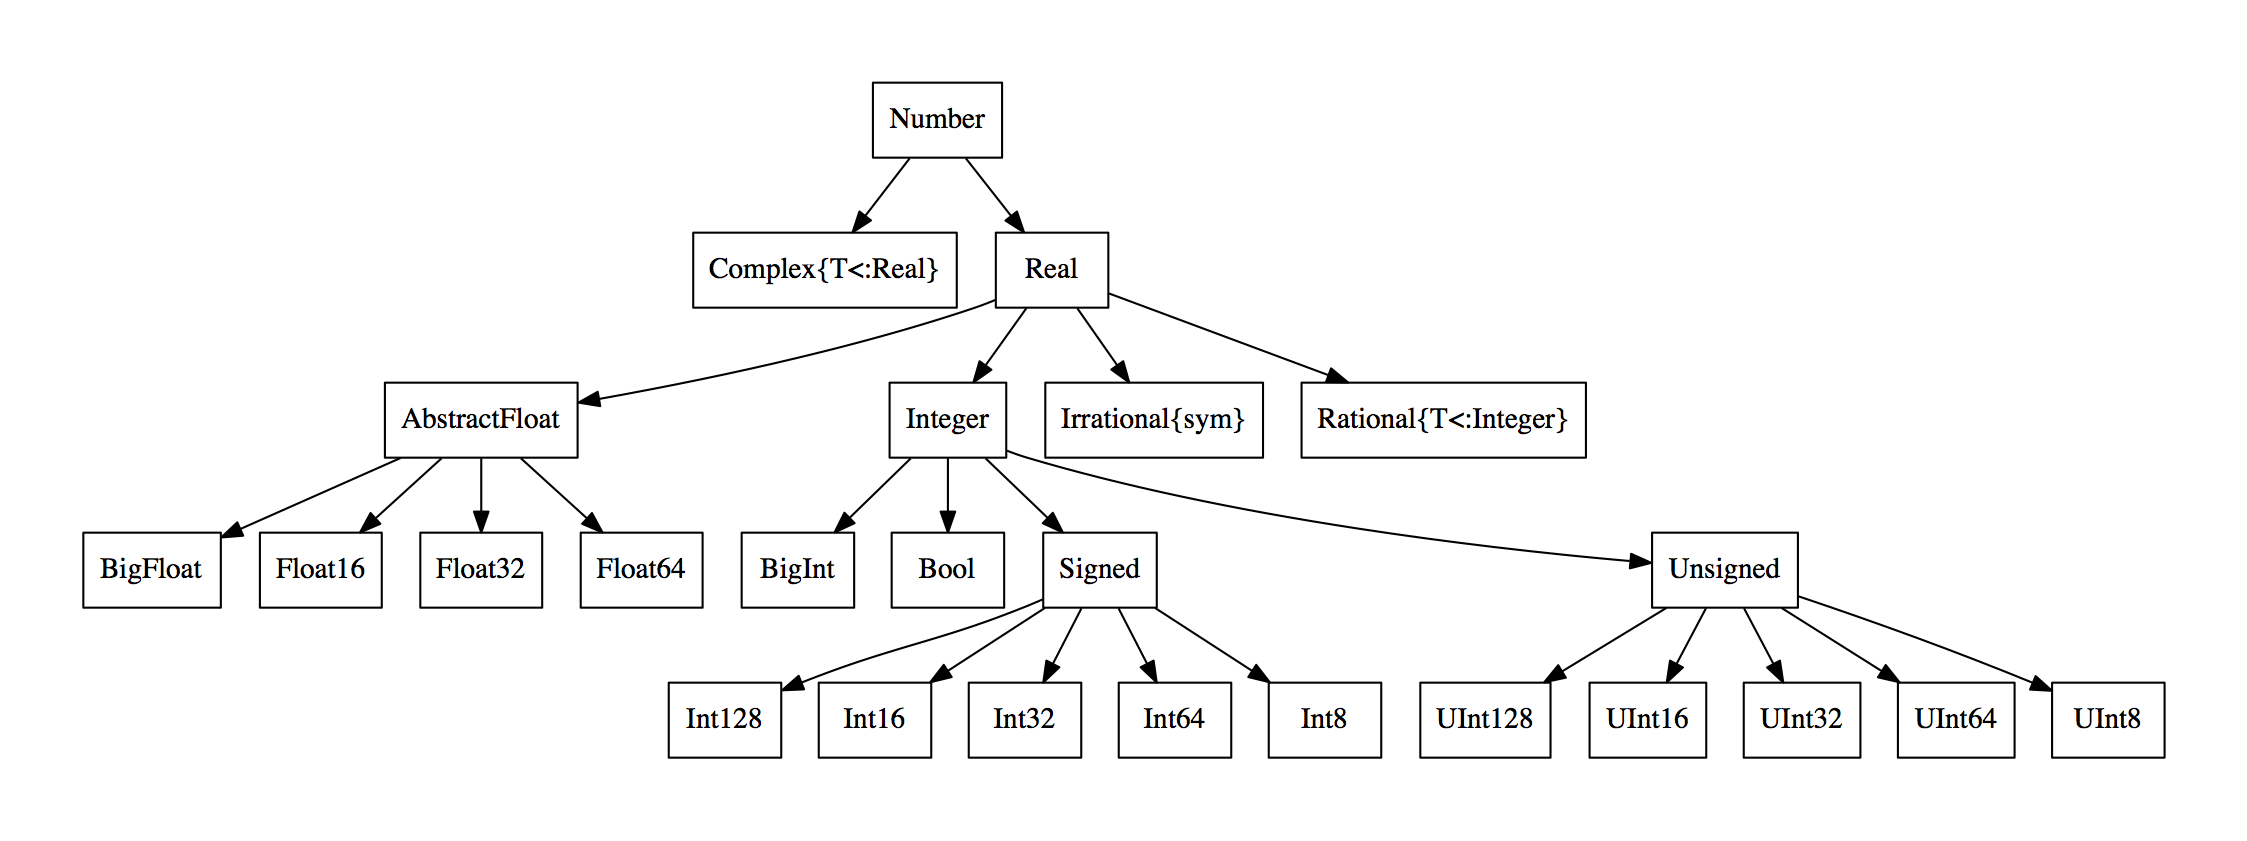

In [6]:
Integer <: Number

true

In [7]:
Integer <: AbstractFloat

false

We can define composite types, like a Class or object in different languages. 

In [8]:
mutable struct Foo
    bar::Int
    baz
end

In Julia, functions are not part of the class definition, as they are in C++ or Python. Instead, only the values of the composite type are defined. We can define default constructors separately, or other functions:

In [9]:
Foo() = Foo(10, "Hello")

function Foo(x::Int)
    Foo(x, nothing)
end

function double!(x::Foo)
    x.bar *= 2
end

double! (generic function with 1 method)

In [10]:
f = Foo()
g = Foo(10)
println("f: ",f)
println("g: ", g)
double!(f)
println("f: ", f)

f: Foo(10, "Hello")
g: Foo(10, nothing)
f: Foo(20, "Hello")


## Julia is flexible

Multiple dispatch is at the base of Julia, allowing for both object oriented and functional programming methods

In [11]:
f + g

MethodError: MethodError: no method matching +(::Foo, ::Foo)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529

In [12]:
import Base.+
+(a::Foo, b::Foo) = Foo(a.bar + b.bar)

+ (generic function with 167 methods)

In [13]:
println("f: ", f)
println("g: ", g)
f + g

f: Foo(20, "Hello")
g: Foo(10, nothing)


Foo(30, nothing)

## Julia is compatible

Julia natively works with C and Fortran. [Packages](https://github.com/JuliaInterop) exist to interface with C++, Python, MATLAB, Java, R, and more.

In [14]:
using PyCall

In [15]:
scipyopt = pyimport("scipy.optimize")
scipyopt.newton(x -> cos(x) - x, 1)

0.7390851332151607

In [16]:
using Cxx

In [17]:
cxx""" #include<iostream> """  

true

In [18]:
cxx"""
    void x_times_2(int x) {
        std::cout << x * 2 << std::endl;
    }
"""

true

In [19]:
jnum=10
typeof(jnum)

Int64

In [20]:
@cxx x_times_2(jnum)

20


## Julia is active

+ [Julia Observer](https://juliaobserver.com/) tracks popular packages
+ [JuliaCon](https://pretalx.com/juliacon2020/) will take place in Portugal in 2020
+ [JuliaComputing](https://juliacomputing.com/) offers many SaaS and PaaS Julia products, actively develops open-source packages and base language
+ Active [discourse](https://discourse.julialang.org/) and [Slack](https://discourse.julialang.org/t/announcing-a-julia-slack/4866) discussions

## Julia is growing

<img src="img/growth.png">